In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from google.colab import files
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2,mutual_info_classif,f_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification, classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/dataset/BRI Hackathon/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/dataset/BRI Hackathon/test.csv')

In [4]:
df_train.shape

(11153, 22)

In [5]:
df_train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0


In [6]:
# Check Missing Values
df_train.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       1
Achievement_above_100%_during3quartal    1
Best Performance                         0
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              6000 non-null   object 
 1   job_duration_in_current_job_level      6000 non-null   float64
 2   person_level                           6000 non-null   object 
 3   job_duration_in_current_person_level   6000 non-null   float64
 4   job_duration_in_current_branch         6000 non-null   float64
 5   Employee_type                          6000 non-null   object 
 6   gender                                 6000 non-null   int64  
 7   age                                    6000 non-null   int64  
 8   marital_status_maried(Y/N)             6000 non-null   object 
 9   number_of_dependences                  6000 non-null   int64  
 10  Education_level                        6000 non-null   object 
 11  GPA 

In [9]:
## numerical variables
numerical_var = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']
numerical_var

['job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
 'gender',
 'age',
 'number_of_dependences',
 'GPA',
 'year_graduated',
 'job_duration_from_training',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual leave',
 'sick_leaves',
 'Last_achievement_%',
 'Achievement_above_100%_during3quartal',
 'Best Performance']

In [10]:
## categorical variables
categorical_var = [feature for feature in df_train.columns if df_train[feature].dtypes == 'O']
categorical_var

['job_level',
 'person_level',
 'Employee_type',
 'marital_status_maried(Y/N)',
 'Education_level']

In [11]:
## change object to category

df_train['job_level'] = df_train['job_level'].astype('category')
df_train['person_level'] = df_train['person_level'].astype('category')
df_train['Employee_type'] = df_train['Employee_type'].astype('category')
df_train['marital_status_maried(Y/N)'] = df_train['marital_status_maried(Y/N)'].astype('category')
df_train['Education_level'] = df_train['Education_level'].astype('category')
df_train['Best Performance'] = df_train['Best Performance'].astype('category')
df_train['gender'] = df_train['gender'].astype('category')

df_test['job_level'] = df_test['job_level'].astype('category')
df_test['person_level'] = df_test['person_level'].astype('category')
df_test['Employee_type'] = df_test['Employee_type'].astype('category')
df_test['marital_status_maried(Y/N)'] = df_test['marital_status_maried(Y/N)'].astype('category')
df_test['Education_level'] = df_test['Education_level'].astype('category')
df_test['gender'] = df_test['gender'].astype('category')

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   job_level                              11153 non-null  category
 1   job_duration_in_current_job_level      11153 non-null  float64 
 2   person_level                           11153 non-null  category
 3   job_duration_in_current_person_level   11153 non-null  float64 
 4   job_duration_in_current_branch         11153 non-null  float64 
 5   Employee_type                          11153 non-null  category
 6   gender                                 11153 non-null  category
 7   age                                    11153 non-null  int64   
 8   marital_status_maried(Y/N)             11153 non-null  category
 9   number_of_dependences                  11153 non-null  int64   
 10  Education_level                        11153 non-null  cat

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   job_level                              6000 non-null   category
 1   job_duration_in_current_job_level      6000 non-null   float64 
 2   person_level                           6000 non-null   category
 3   job_duration_in_current_person_level   6000 non-null   float64 
 4   job_duration_in_current_branch         6000 non-null   float64 
 5   Employee_type                          6000 non-null   category
 6   gender                                 6000 non-null   category
 7   age                                    6000 non-null   int64   
 8   marital_status_maried(Y/N)             6000 non-null   category
 9   number_of_dependences                  6000 non-null   int64   
 10  Education_level                        6000 non-null   categ

In [14]:
corr = df_train.corr()

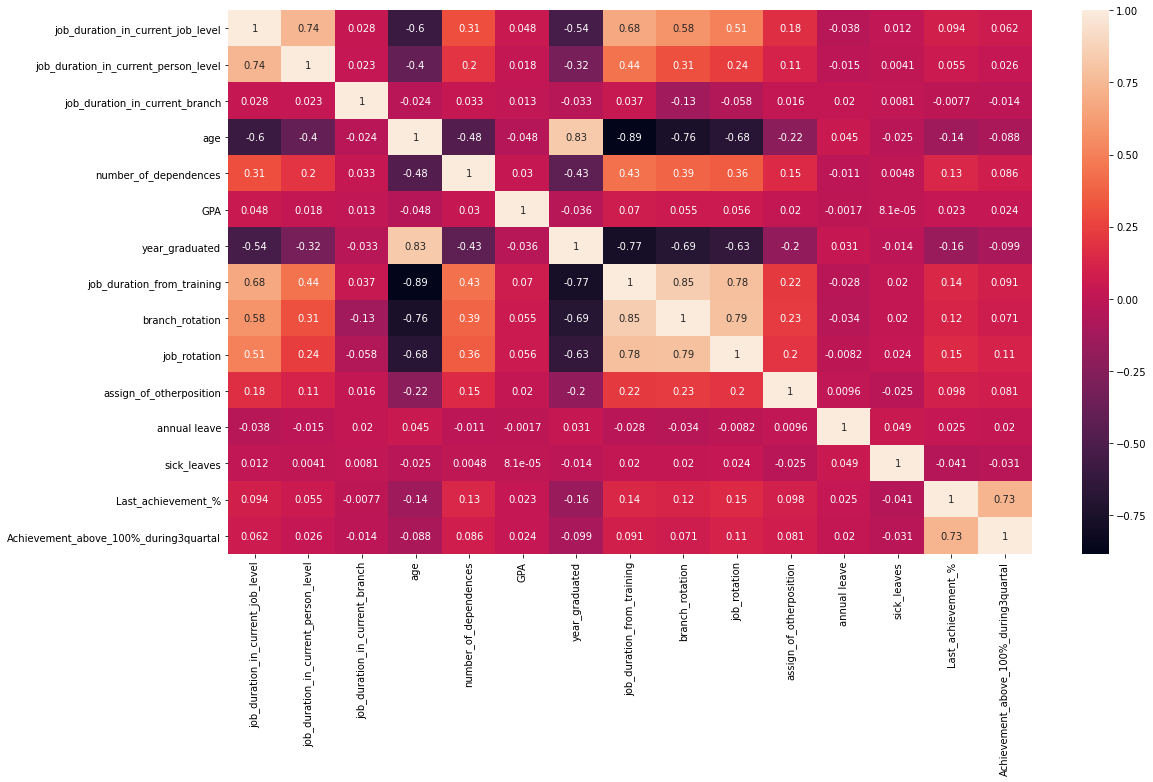

In [15]:
plt.figure(figsize=(18,10))
sns.heatmap(corr,annot=True)

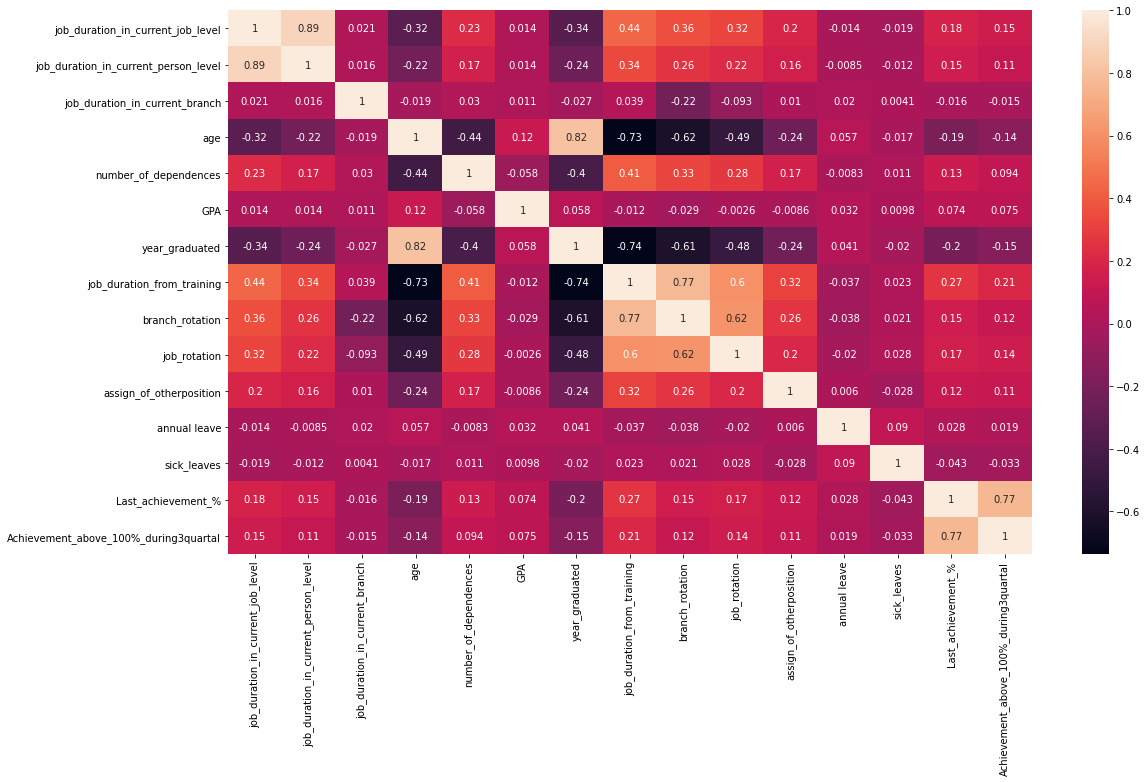

In [16]:
corr = df_train.corr(method='spearman')
plt.figure(figsize=(18,10))
sns.heatmap(corr,annot=True)


# **FEATURE ENGINEERING**





In [22]:
data_train = df_train.copy()
data_test = df_test.copy()

In [23]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   job_level                              11153 non-null  category
 1   job_duration_in_current_job_level      11153 non-null  float64 
 2   person_level                           11153 non-null  category
 3   job_duration_in_current_person_level   11153 non-null  float64 
 4   job_duration_in_current_branch         11153 non-null  float64 
 5   Employee_type                          11153 non-null  category
 6   gender                                 11153 non-null  category
 7   age                                    11153 non-null  int64   
 8   marital_status_maried(Y/N)             11153 non-null  category
 9   number_of_dependences                  11153 non-null  int64   
 10  Education_level                        11153 non-null  cat

In [24]:
# Check Missing Values
data_train.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       1
Achievement_above_100%_during3quartal    1
Best Performance                         0
dtype: int64

In [25]:
# Delete all missing values
data_train = data_train.dropna()

In [26]:
# Check Missing Values
data_train.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       0
Achievement_above_100%_during3quartal    0
Best Performance                         0
dtype: int64

**Replacing Data**

In [27]:
### Converting categorical into numerical
#### Categorical Feature ####
## Job Level
data_train['job_level'] = data_train['job_level'].replace('JG03',0)
data_train['job_level'] = data_train['job_level'].replace('JG04',1)
data_train['job_level'] = data_train['job_level'].replace('JG05',2)
data_train['job_level'] = data_train['job_level'].replace('JG06',3)

## Job Level from df_train
df_test['job_level'] = df_test['job_level'].replace('JG03',0)
df_test['job_level'] = df_test['job_level'].replace('JG04',1)
df_test['job_level'] = df_test['job_level'].replace('JG05',2)
df_test['job_level'] = df_test['job_level'].replace('JG06',3)


## Person Level
data_train['person_level'] = data_train['person_level'].replace('PG01',0)
data_train['person_level'] = data_train['person_level'].replace('PG02',1)
data_train['person_level'] = data_train['person_level'].replace('PG03',2)
data_train['person_level'] = data_train['person_level'].replace('PG04',3)
data_train['person_level'] = data_train['person_level'].replace('PG05',4)
data_train['person_level'] = data_train['person_level'].replace('PG06',5)
data_train['person_level'] = data_train['person_level'].replace('PG07',6)
data_train['person_level'] = data_train['person_level'].replace('PG08',7)

## Person Level from df_test
df_test['person_level'] = df_test['person_level'].replace('PG01',0)
df_test['person_level'] = df_test['person_level'].replace('PG02',1)
df_test['person_level'] = df_test['person_level'].replace('PG03',2)
df_test['person_level'] = df_test['person_level'].replace('PG04',3)
df_test['person_level'] = df_test['person_level'].replace('PG05',4)
df_test['person_level'] = df_test['person_level'].replace('PG06',5)
df_test['person_level'] = df_test['person_level'].replace('PG07',6)
df_test['person_level'] = df_test['person_level'].replace('PG08',7)

## Employee type
data_train['Employee_type'] = data_train['Employee_type'].replace('RM_type_A',0)
data_train['Employee_type'] = data_train['Employee_type'].replace('RM_type_B',1)
data_train['Employee_type'] = data_train['Employee_type'].replace('RM_type_C',2)

## Employee type from df_test
df_test['Employee_type'] = df_test['Employee_type'].replace('RM_type_A',0)
df_test['Employee_type'] = df_test['Employee_type'].replace('RM_type_B',1)
df_test['Employee_type'] = df_test['Employee_type'].replace('RM_type_C',2)

## Marital Status 
data_train['marital_status_maried(Y/N)'] = data_train['marital_status_maried(Y/N)'].replace('N',0)
data_train['marital_status_maried(Y/N)'] = data_train['marital_status_maried(Y/N)'].replace('Y',1)

## Marital Status from df_test
df_test['marital_status_maried(Y/N)'] = df_test['marital_status_maried(Y/N)'].replace('N',0)
df_test['marital_status_maried(Y/N)'] = df_test['marital_status_maried(Y/N)'].replace('Y',1)

## education level
data_train['Education_level'] = data_train['Education_level'].replace('level_0',0)
data_train['Education_level'] = data_train['Education_level'].replace('level_1',1)
data_train['Education_level'] = data_train['Education_level'].replace('level_2',2)
data_train['Education_level'] = data_train['Education_level'].replace('level_3',3)
data_train['Education_level'] = data_train['Education_level'].replace('level_4',4)
data_train['Education_level'] = data_train['Education_level'].replace('level_5',5)

## education level from df_test 
df_test['Education_level'] = df_test['Education_level'].replace('level_0',0)
df_test['Education_level'] = df_test['Education_level'].replace('level_1',1)
df_test['Education_level'] = df_test['Education_level'].replace('level_2',2)
df_test['Education_level'] = df_test['Education_level'].replace('level_3',3)
df_test['Education_level'] = df_test['Education_level'].replace('level_4',4)
df_test['Education_level'] = df_test['Education_level'].replace('level_5',5)


In [28]:
# delete duplicate row
duplicated_rows = data_train.duplicated()
keep_row = [not index for index in duplicated_rows]
data_train = data_train[keep_row]
data_train.shape


(11152, 22)

# **Normalization**

In [29]:
data_train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,1,1.352775,2,1.352775,1.732051,0,2,1985,1,1,0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,1,1.292285,2,1.292285,1.039230,0,2,1989,1,0,1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,2,2.565151,5,2.308679,1.780449,2,1,1970,1,1,1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,2,2.828427,5,1.000000,1.385641,0,2,1967,1,2,1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,2,2.828427,5,2.828427,0.707107,0,2,1965,1,3,1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0


In [30]:
data_train.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'gender', 'age',
       'marital_status_maried(Y/N)', 'number_of_dependences',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'Best Performance'],
      dtype='object')

In [40]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_train.drop('Best Performance', axis = 1))

In [41]:
scaled_data = pd.DataFrame(scaled_data, columns= ['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'gender', 'age',
       'marital_status_maried(Y/N)', 'number_of_dependences',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal'])
scaled_data

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,-0.239087,-0.186613,-0.331605,0.010940,1.673522,-0.684414,0.599447,-0.180619,0.416859,0.004987,-7.784641,-0.023737,0.443550,-0.452578,-0.717004,-0.278090,0.309566,-0.250499,-0.405301,-1.123126,-0.613250
1,-0.239087,-0.326934,-0.331605,-0.175378,0.010974,-0.684414,0.599447,0.682947,0.416859,-1.130019,-5.740845,0.308052,-0.528013,-0.452578,0.116654,-0.278090,-0.467099,-1.381495,-0.036479,-1.066242,-0.613250
2,3.752370,2.625778,4.046527,2.955266,1.789664,2.823209,-1.668204,-3.418992,0.416859,0.004987,-5.740845,-0.238425,-4.900049,4.315440,2.617627,3.022289,1.862896,-0.627498,-0.036479,-1.368030,-0.613250
3,3.752370,3.236508,4.046527,-1.075658,0.842248,-0.684414,0.599447,-4.066667,0.416859,1.139993,-5.740845,-0.238425,-5.385830,4.514108,3.034455,1.372100,-0.467099,0.126500,3.282923,-1.077532,-0.613250
4,3.752370,3.236508,4.046527,4.556165,-0.786018,-0.684414,0.599447,-4.498450,0.416859,2.274999,-5.740845,0.302047,-5.871612,4.712775,2.200798,2.472226,0.309566,-0.250499,-0.405301,-1.087953,-0.613250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11147,-0.239087,-0.408831,-0.331605,-0.284121,0.456149,-0.684414,0.599447,0.035272,0.416859,0.004987,2.434338,0.011543,1.658005,-0.452578,-0.300175,-0.278090,-0.467099,0.126500,-0.036479,-0.927723,-0.613250
11148,-0.239087,-0.110373,-0.331605,0.112171,1.843240,1.069397,-1.668204,0.467055,0.416859,1.139993,2.434338,-0.013228,1.415114,-0.651245,-1.133833,-0.828153,-0.467099,0.880498,-0.405301,0.333274,-0.613250
11149,-0.239087,-0.408831,-0.331605,-0.284121,0.842248,1.069397,0.599447,1.114730,0.416859,-1.130019,2.434338,0.022803,1.900895,-0.849912,-1.133833,-0.828153,-0.467099,0.126500,-0.405301,0.266837,-0.613250
11150,-0.239087,-0.731150,-0.331605,-0.712096,-2.482849,-0.684414,-1.668204,0.251164,0.416859,0.004987,2.434338,0.026557,0.686441,-0.253910,0.533483,0.271973,-0.467099,0.126500,-0.036479,0.595113,0.289822


# **Feature Selection**

In [34]:
# Categorical independent variable, categorical dependent variable using mutual information

X_mut = scaled_data[['job_level','person_level','Employee_type','gender','marital_status_maried(Y/N)']]
y_mut = data_train['Best Performance']

print(X_mut)
print(y_mut)
mut_score = mutual_info_classif(X_mut, y_mut)
print(mut_score)


       job_level  person_level  ...    gender  marital_status_maried(Y/N)
0      -0.239087     -0.331605  ...  0.599447                    0.416859
1      -0.239087     -0.331605  ...  0.599447                    0.416859
2       3.752370      4.046527  ... -1.668204                    0.416859
3       3.752370      4.046527  ...  0.599447                    0.416859
4       3.752370      4.046527  ...  0.599447                    0.416859
...          ...           ...  ...       ...                         ...
11147  -0.239087     -0.331605  ...  0.599447                    0.416859
11148  -0.239087     -0.331605  ... -1.668204                    0.416859
11149  -0.239087     -0.331605  ...  0.599447                    0.416859
11150  -0.239087     -0.331605  ... -1.668204                    0.416859
11151  -0.239087      1.127772  ...  0.599447                    0.416859

[11152 rows x 5 columns]
0        0
1        0
2        0
3        1
4        0
        ..
11148    0
11149    

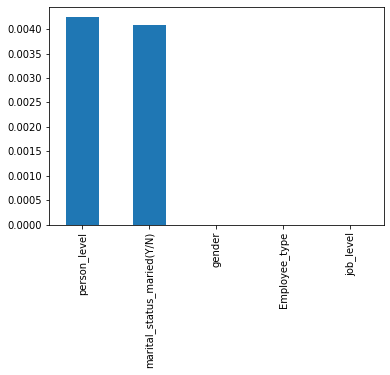

In [35]:
mut_values = pd.Series(mut_score, index = X_mut.columns)
mut_values = mut_values.sort_values(ascending= False)
mut_values.plot.bar()

In [36]:
# numerical input, categorical output
X_anova = scaled_data.drop(['job_level',
 'person_level',
 'Employee_type',
 'marital_status_maried(Y/N)',
 'Education_level','gender'],axis=1)
y_anova = data_train['Best Performance']

In [37]:
f_anova = f_classif(X_anova,y_anova)
f_anova

(array([0.53948145, 2.90972746, 3.32725564, 4.00842608, 1.11737181,
        0.66848807, 0.7999602 , 4.12015794, 2.87925721, 0.66477196,
        0.59178498, 1.18052691, 1.45169311, 1.78261097, 0.24869088]),
 array([0.46266316, 0.0880746 , 0.06816724, 0.04529757, 0.29050798,
        0.4135967 , 0.37112457, 0.04239882, 0.08975531, 0.41489772,
        0.441746  , 0.27727224, 0.22828205, 0.1818563 , 0.61800822]))

Text(0.5, 1.0, 'F-test Anova')

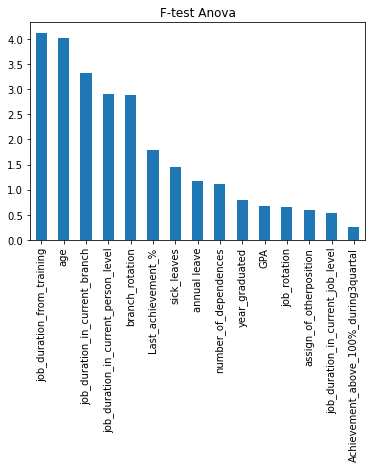

In [38]:
f_anova_value = pd.Series(f_anova[0],index=X_anova.columns)
f_anova_value = f_anova_value.sort_values(ascending=False)
f_anova_value.plot.bar()
plt.title('F-test Anova')


In [39]:
scaled_data.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'gender', 'age',
       'marital_status_maried(Y/N)', 'number_of_dependences',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal'],
      dtype='object')

In [ ]:
scaled_data = scaled_data.drop(['job_level','person_level','year_graduated','GPA','job_rotation','assign_of_otherposition','job_duration_in_current_job_level',
                                'Achievement_above_100%_during3quartal'],axis=1)

In [ ]:
df_test = df_test.drop(['job_level','person_level','year_graduated','GPA','job_rotation','assign_of_otherposition','job_duration_in_current_job_level',
                                'Achievement_above_100%_during3quartal'],axis=1)

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data_train.corr(), annot = True)

In [42]:
import statsmodels.api as sm

X = scaled_data
y = data_train['Best Performance']

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#sns.pairplot(data_train, hue="Best Performance")

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

feat_labels = X
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X,y)
print(X_oversample.shape, y_oversample.shape)
pd.Series(y_oversample).value_counts()
X_train, X_test, y_train, y_test = train_test_split(X_oversample, y_oversample, test_size=len(df_test), random_state=42)

clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(19030, 21) (19030,)
('job_level', 0.0015679820289200327)
('job_duration_in_current_job_level', 0.06372685056568894)
('person_level', 0.003913608213422365)
('job_duration_in_current_person_level', 0.06308237734511471)
('job_duration_in_current_branch', 0.08328988460708012)
('Employee_type', 0.0144907980339662)
('gender', 0.011181525796162136)
('age', 0.06404601128978502)
('marital_status_maried(Y/N)', 0.007474913324933818)
('number_of_dependences', 0.029702297662986175)
('Education_level', 0.010568171281089377)
('GPA', 0.10246138202263731)
('year_graduated', 0.06070845664315205)
('job_duration_from_training', 0.07773413311747117)
('branch_rotation', 0.0760416494483759)
('job_rotation', 0.0679307406881086)
('assign_of_otherposition', 0.04073754983112866)
('annual leave', 0.06303404892306579)
('sick_leaves', 0.07155156019061064)
('Last_achievement_%', 0.06678901304462416)
('Achievement_above_100%_during3quartal', 0.019967045941676934)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=False,

In [48]:
sfm = SelectFromModel(clf, threshold=0.015)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=False,

In [49]:
sfm.get_support()

array([False,  True, False,  True,  True, False, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [50]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [53]:
len(X_important_train)

13030

In [54]:
len(X_important_test)

6000

# **Modeling**

**Roihan**

#####1. Logistic Regression

In [59]:
logreg = LogisticRegression()
logreg.fit(X_important_train, y_train)
y_pred_lr = logreg.predict_proba(X_important_test)

In [60]:
y_pred_lr = y_pred_lr[:,1]
auc_lr = roc_auc_score(y_test, y_pred_lr)
fpr_lr,tpr_lr,threshold_lr = roc_curve(y_test, y_pred_lr)
print("AUC Score: ",auc_lr)
print("True Positive Rate: ", tpr_lr)
print("False Positive Rate: ",fpr_lr)
print("Threshold: ",threshold_lr)

AUC Score:  0.5377230099115516
True Positive Rate:  [0.         0.         0.         ... 0.99966887 1.         1.        ]
False Positive Rate:  [0.00000000e+00 3.35570470e-04 1.00671141e-03 ... 9.98322148e-01
 9.98322148e-01 1.00000000e+00]
Threshold:  [1.74398567 0.74398567 0.69486177 ... 0.25357511 0.25114116 0.12542718]


##### 2. KNN

In [61]:
n_neighbors = [1,3,5,7,9,11,13,15,17,19,21]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(x) for x in np.linspace(start = 10, stop= 100, num= 10)]
p = [1,2]
random_grid = {
      'n_neighbors' : n_neighbors,
      'weights' : weights,
      'algorithm' : algorithm,
      'leaf_size' : leaf_size,
      'p' : p
}

knn_clf = KNeighborsClassifier()
knn_randomcv = RandomizedSearchCV(estimator= knn_clf, param_distributions= random_grid, n_iter= 25, cv = 5, verbose= 2, random_state= 100, n_jobs= 1)
knn_randomcv.fit(X_important_train,y_train)
best_random_grid_knn = knn_randomcv.best_estimator_
y_pred_knn = best_random_grid_knn.predict_proba(X_important_test)
print("Best: %f using %s" % (knn_randomcv.best_score_, knn_randomcv.best_params_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] weights=distance, p=1, n_neighbors=7, leaf_size=20, algorithm=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=distance, p=1, n_neighbors=7, leaf_size=20, algorithm=auto, total=   1.0s
[CV] weights=distance, p=1, n_neighbors=7, leaf_size=20, algorithm=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=7, leaf_size=20, algorithm=auto, total=   1.0s
[CV] weights=distance, p=1, n_neighbors=7, leaf_size=20, algorithm=auto 
[CV]  weights=distance, p=1, n_neighbors=7, leaf_size=20, algorithm=auto, total=   1.1s
[CV] weights=distance, p=1, n_neighbors=7, leaf_size=20, algorithm=auto 
[CV]  weights=distance, p=1, n_neighbors=7, leaf_size=20, algorithm=auto, total=   1.1s
[CV] weights=distance, p=1, n_neighbors=7, leaf_size=20, algorithm=auto 
[CV]  weights=distance, p=1, n_neighbors=7, leaf_size=20, algorithm=auto, total=   1.0s
[CV] weights=distance, p=2, n_neighbors=15, leaf_size=10, algorithm=auto 
[CV]  weights=distance, p=2, n_neighbors=15, leaf_size=10, algorithm=auto, total=   1.1s
[CV] weights=distance, p=2, n_neighbors=15, leaf_size=10, algorithm=auto 
[CV]  weights=distance, p=2, n_neighbors=15, leaf_size=10, algorithm=auto, total=   1.1s
[CV] weights=distance, p=2, n_neighbors=15, leaf_size=10, algorithm=auto 
[CV]  weights=distance, p=2, 

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.8min finished


Best: 0.849424 using {'weights': 'uniform', 'p': 1, 'n_neighbors': 1, 'leaf_size': 10, 'algorithm': 'kd_tree'}


In [ ]:
y_pred_knn

In [62]:
y_pred_knn = y_pred_knn[:,1]
auc_knn = roc_auc_score(y_test, y_pred_knn)
fpr_knn,tpr_knn,threshold_knn = roc_curve(y_test, y_pred_knn)
print("AUC Score: ",auc_knn)
print("True Positive Rate: ", tpr_knn)
print("False Positive Rate: ",fpr_knn)
print("Threshold: ",threshold_knn)

AUC Score:  0.8733788168363039
True Positive Rate:  [0.         0.96655629 1.        ]
False Positive Rate:  [0.         0.21979866 1.        ]
Threshold:  [2. 1. 0.]


##### 3. Random Forest

In [63]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=5,cv=3,verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(X_important_train,y_train)
best_random_grid_rf=rf_randomcv.best_estimator_
y_pred_rf=best_random_grid_rf.predict_proba(X_important_test)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.1min finished


In [64]:
y_pred_rf = y_pred_rf[:,1]
auc_rf = roc_auc_score(y_test, y_pred_rf)
fpr_rf,tpr_rf,threshold_rf = roc_curve(y_test, y_pred_rf)
print("AUC Score: ",auc_rf)
print("True Positive Rate: ", tpr_rf)
print("False Positive Rate: ",fpr_rf)
print("Threshold: ",threshold_rf)




AUC Score:  0.9529819658651495
True Positive Rate:  [0.         0.00430464 0.00463576 ... 0.99966887 1.         1.        ]
False Positive Rate:  [0.         0.         0.         ... 0.98791946 0.98791946 1.        ]
Threshold:  [2.         1.         0.99916667 ... 0.06883333 0.06816667 0.03291667]


In [ ]:
hasil_rf = pd.Series(y_pred_rf)
hasil_rf = pd.DataFrame(hasil_rf)

hasil_rf.columns = ['Best Performance']

hasil_rf.to_csv('hasil_rf_new.csv')

!cp hasil_rf_new.csv '/content/drive/MyDrive/dataset/BRI Hackathon/'

##### 4. XGBoost

In [65]:
model_xgb = XGBClassifier()
model_xgb.fit(X_important_train, y_train)
y_pred_xgb = model_xgb.predict_proba(X_important_test)

In [66]:
y_pred_xgb = y_pred_xgb[:,1]
auc_xgb = roc_auc_score(y_test, y_pred_xgb)
fpr_xgb,tpr_xgb,threshold_xgb = roc_curve(y_test, y_pred_xgb)
print("AUC Score: ",auc_xgb)
print("True Positive Rate: ", tpr_xgb)
print("False Positive Rate: ",fpr_xgb)
print("Threshold: ",threshold_xgb)

AUC Score:  0.9219515311791635
True Positive Rate:  [0.00000000e+00 3.31125828e-04 3.31125828e-03 ... 9.99668874e-01
 1.00000000e+00 1.00000000e+00]
False Positive Rate:  [0.         0.         0.         ... 0.99194631 0.99194631 1.        ]
Threshold:  [1.999516   0.999516   0.9977564  ... 0.08620299 0.08595511 0.0591318 ]


##### ROC AUC

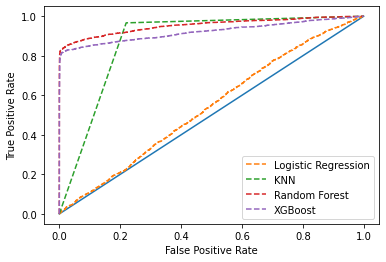

In [67]:
plt.plot([0,1],[0,1],linestyle= '-')
plt.plot(fpr_lr,tpr_lr,linestyle='--', label='Logistic Regression')
plt.plot(fpr_knn,tpr_knn,linestyle='--', label='KNN')
plt.plot(fpr_rf,tpr_rf,linestyle='--', label='Random Forest')
plt.plot(fpr_xgb,tpr_xgb,linestyle='--', label='XGBoost')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

Based on those models, **Random Forest** have the highest AUC score. So in this case, we use **Random Forest** as our final model